# Low Carbon Steel Optical Micrographs

## Introduction

This page is an example of how to obtain 2-point statistics using PyMKS tools. The workflow is the following: import image dataset, display the images, threshold the images if necessary, and calculate 2-point statistics for the images.

First, we will go through the process of calculating 2-point statistics on the full-size images at different magnifications and then perform the same procedure on cropped versions of the original images. Since sometimes images are very large, and we want to crop them to reduce the effort of computing the 2-point statistics. 

The dataset that we are importing is optical micrographs of chemically etched low carbon steel. It is etched to display some features of the microstructure, which otherwise would not be visible.

## Load Data

First we are going to import the image dataset.

In [11]:
import pymks

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from pymks_share import DataManager


manager = DataManager ('pymks.me.gatech.edu')
X = manager.fetch_data('Low-Carbon Steel Optical Micrographs')



Now, we will display the images using the PyMKS `draw_microstructure` tool.

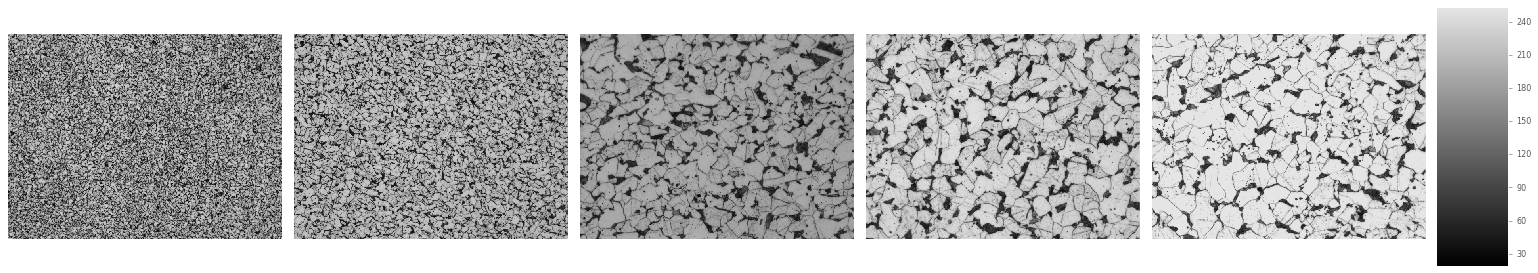

In [13]:
import skimage.io as io
import matplotlib.pylab as plt
import numpy as np
from pymks.tools import draw_microstructures


draw_microstructures(X)


The images were taken at different magnifications (increasing left to right), 50x, 100x, 200x, 500x, and 500x with higher exposure value. Although the images were obtained using the same equipment, there are some variations in brightness, contrast, exposure, etc., to account for variation in image collection process.

## Image Segmentation

The imported images are in grayscale. We need to make them black and white, since we know that there are only two different particles in the microstructure. We do this by thresholding the image using Otsu's method. By thresholding, each pixel in the image will become either black or white, giving us only 2 local states.

In [14]:
from skimage.filters import threshold_otsu


X_thresh = np.array([threshold_otsu(x) for x in X])
X_binary = X > X_thresh[:, None, None]


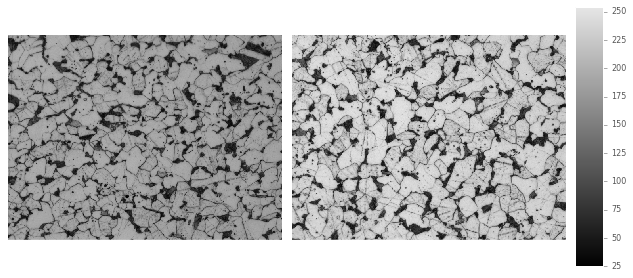

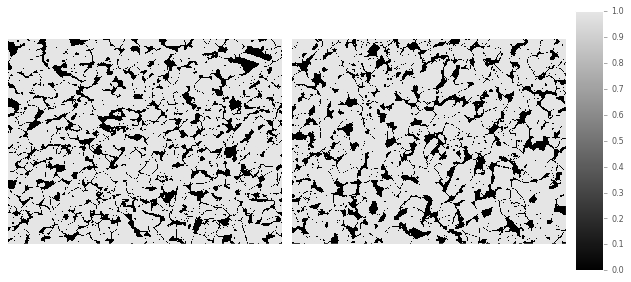

In [15]:
draw_microstructures(X[2:4,:,:])
draw_microstructures(X_binary[2:4,:,:])

We plotted two original images at 200x (top left) and 500x (top right) to compare with their thresholded image (bottom). The original images have 256 shades of gray and the thresholded images have only two shades, 0 or 1, seen in the scale bar.

In the original images, we can clearly see grain boundaries, whereas in the thresholded images, some of the grain boundaries are removed from the image, better seen in the 500x image (bottom right).

## 2-Point Statistics

Now we are going to compute correlations using PyMKS `correlate` tool, which computes auto- and cross-correlations for all phases in the microstructure. We have 2 phases in our microstructure `n_states=2`.

In [16]:
from pymks.stats import correlate
from pymks import PrimitiveBasis


prim_basis = PrimitiveBasis(n_states=2)
X_corr = correlate(X_binary, prim_basis, periodic_axes=(0,1))
print("Shape of X_corr")
print(X_corr.shape)


Shape of X_corr
(5, 520, 694, 3)


After computing the correlations we have three correlation results for each of our 5 microstructures. Note that the array of each correlation plot is the same as the original image. For each image we obtain 3 correlation plots.

We will plot the 2-point statistics below. 

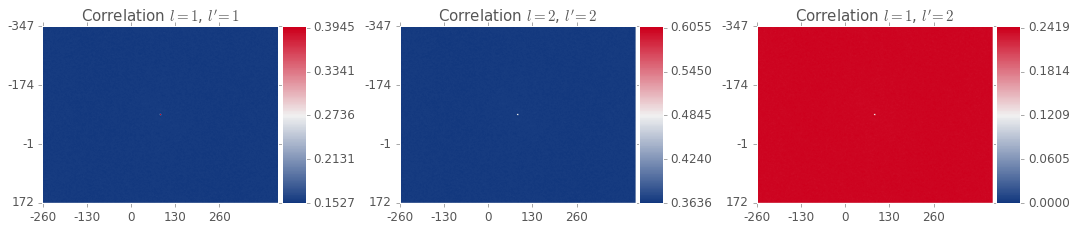

Volume fraction of black phase
0.394543892707
Volume fraction of white phase
0.605456107293


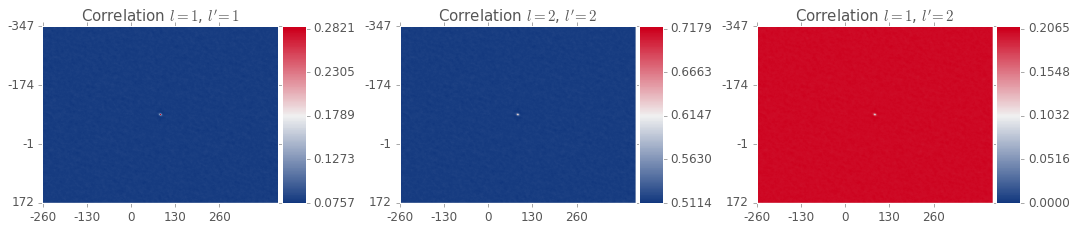

Volume fraction of black phase
0.282115938816
Volume fraction of white phase
0.717884061184


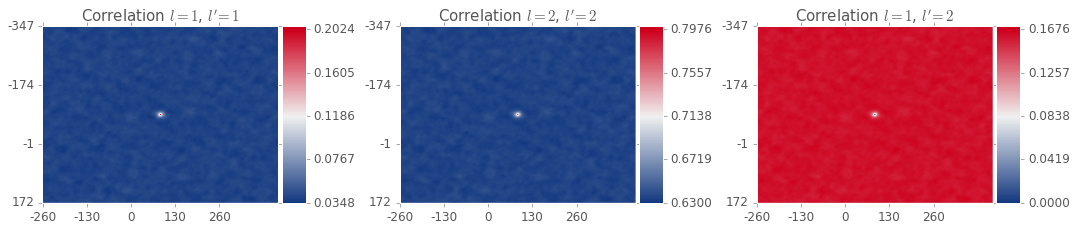

Volume fraction of black phase
0.20237475061
Volume fraction of white phase
0.79762524939


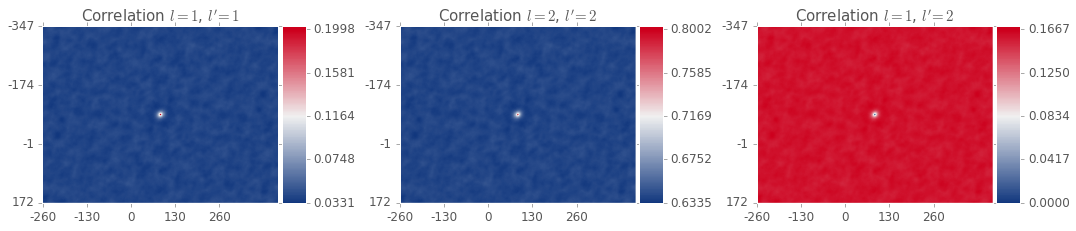

Volume fraction of black phase
0.19978940368
Volume fraction of white phase
0.80021059632


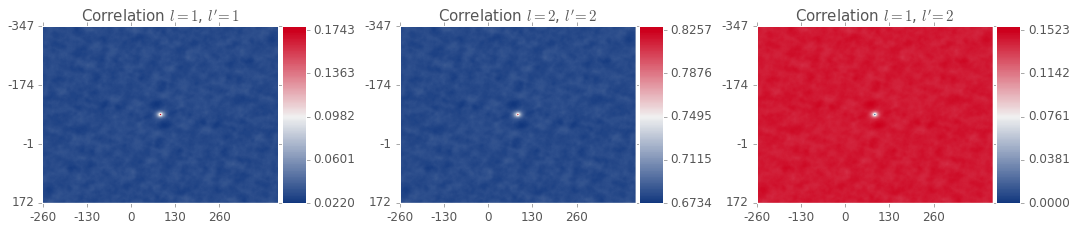

Volume fraction of black phase
0.174321103968
Volume fraction of white phase
0.825678896032


In [17]:
from pymks.tools import draw_correlations


for x in X_corr:
    draw_correlations(x, correlations=[(1, 1), (2, 2), (1, 2)])
    x_center = (X_corr.shape[1] + 1) / 2
    y_center = (X_corr.shape[2] + 1) / 2
    print('Volume fraction of black phase')
    print(x[x_center, y_center, 0])
    print('Volume fraction of white phase')
    print(x[x_center, y_center, 1])


The above plots indicate the states on which the 2-point statistics have been calculated (black-black, white-white, black-white). In this case, the black phase is labelled as 1 and white phase as 2. The grain pattern in the original images seem random and the grain shapes are different. From the correlation plots, we cannot tell any microstructure features or patterns that clearly stand out. 

We can focus on the volume fractions for each image. For images at highest magnification (500x) the volume fraction of the black phase is minimum at 17.4%, and at lowest magnification (50x), it is 39.5%. 

The difference in volume fraction is because the lower magnification images retained a higher amount of grain boundary information in the image after thresholding. Grain boundary information is not desirable since it is not part of a particular phase. A grain boundary can separate two phases that appear white, and the statistics treat the grain boundary as a black phase, which will not be accurate.

Since we see less grain boundaries in the higher magnification images (500x), these images are more reliable for computing 2-point statistics. The images with 500x show a volume fraction of black phase of 20.0% and 17.4%. The image of 200x shows a volume fraction of 20.2%, which is in good agreement with the statistics of 500x images compared to 50x and 100x, 39.5% and 28.2%, respectively. 

The volume fractions vary slightly in 200x and 500x images, which is expected since the images were taken at different locations. However, the etched images at higher magnification are more reliable for 2-statistics since they do include as much grain boundary information as the lower magnification images.

## 2-Point Statistics on Cropped Images
Now we are going to crop the image to the first 300 pixels in horizontal and vertical directions and repeat the process of computing the 2-point statistics. Our new images are going to be 300x300 pixels.

Shape of X
(5, 250, 250)


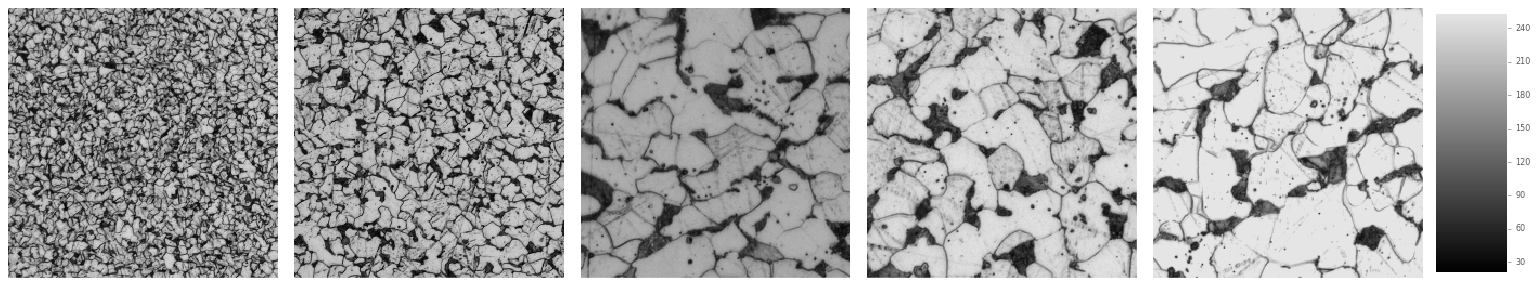

In [18]:
X_crop = X[:,0:250,0:250]
print('Shape of X')
print(X_crop.shape)
draw_microstructures(X_crop)


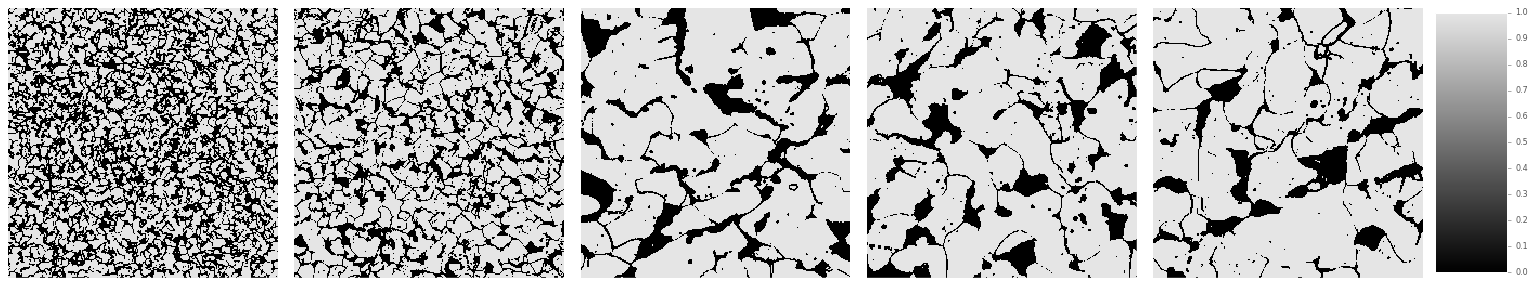

In [19]:
X_thresh = np.array([threshold_otsu(x) for x in X_crop])
X_binary_crop = X_crop > X_thresh[:, None, None]
    
draw_microstructures(X_binary_crop)


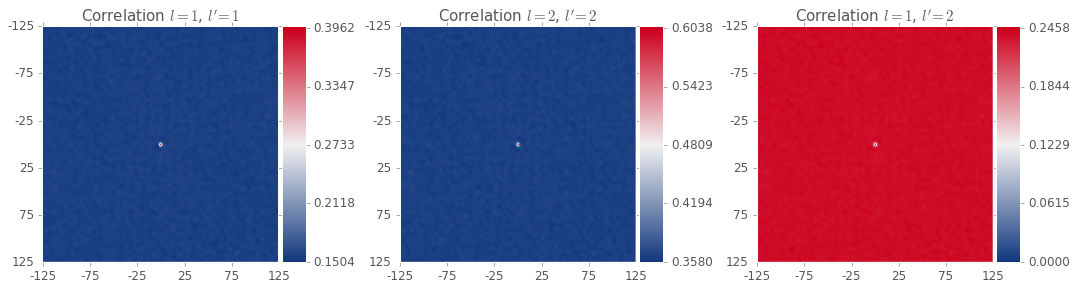

Volume fraction of black phase
0.396192
Volume fraction of white phase
0.603808


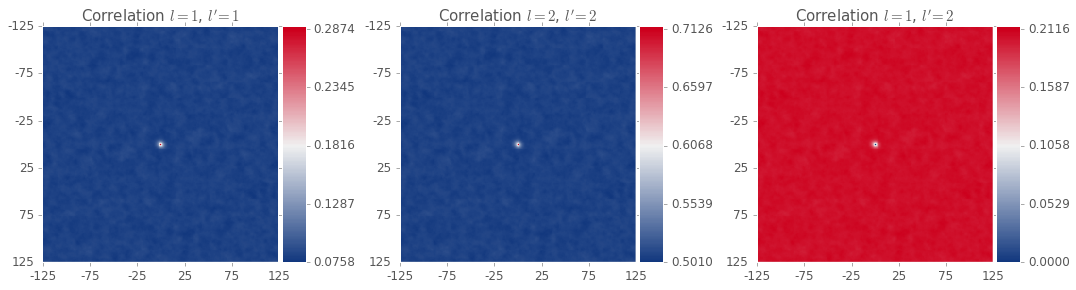

Volume fraction of black phase
0.287408
Volume fraction of white phase
0.712592


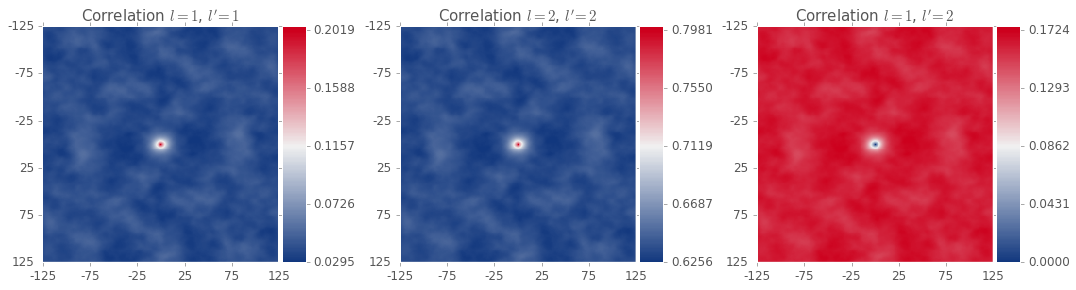

Volume fraction of black phase
0.20192
Volume fraction of white phase
0.79808


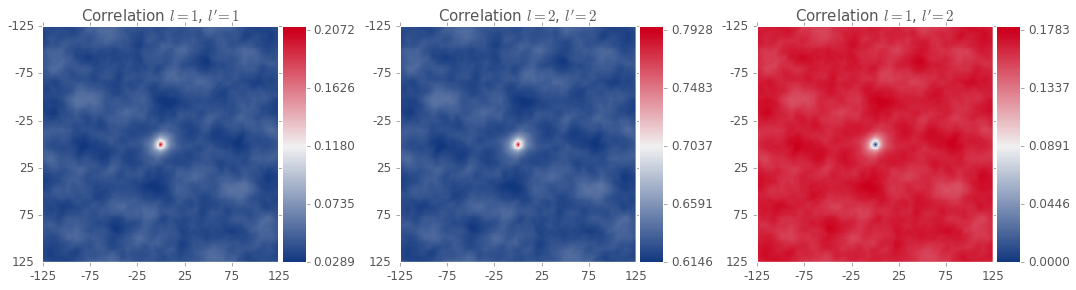

Volume fraction of black phase
0.207168
Volume fraction of white phase
0.792832


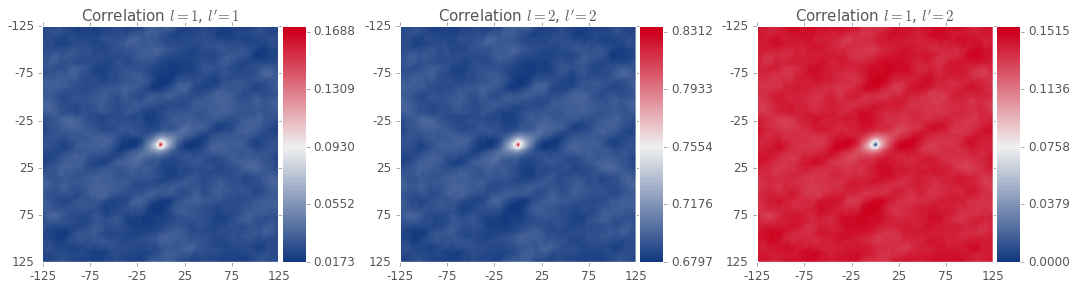

Volume fraction of black phase
0.1688
Volume fraction of white phase
0.8312


In [20]:
prim_basis = PrimitiveBasis(n_states=2)
X_corr_crop = correlate(X_binary_crop, prim_basis, periodic_axes=(0,1))

for x in X_corr_crop:
    draw_correlations(x, correlations=[(1, 1), (2, 2), (1, 2)])
    x_center = (X_corr_crop.shape[1] + 1) / 2
    y_center = (X_corr_crop.shape[2] + 1) / 2
    print('Volume fraction of black phase')
    print(x[x_center, y_center, 0])
    print('Volume fraction of white phase')
    print(x[x_center, y_center, 1])


We have computed the 2-point statistics for the cropped images. The volume fractions for cropped images are very close to the volume fractions of the original resolution images, within 5% difference.

At higher resolution images (500x) we can now better observe the distribution of the black and white phases. For example, in 2-point statistics result for last image, we can see the distribution of the black and white phases in a diagonal direction. It is not so evident for lower magnification images.

We now have more meaningful 2-point statistics plots for the cropped images at higher magnifications (200x, 500x). However, for lower magnification images we do not yet have insightful spatial correlations. To improve the spatial statistics for 50x and 100x, we can crop the images further, which will approximately match the view field of the higher magnification images.

Spatial correlations are a more rigorous way to analyze microstructure images rather than using intuition and expertise. It is important to have an image with a view field that is representative of the whole microstructure for 2-point statistics computations. Once two point statistics have been computed for a dataset, the spatial correlations can by further analyzed using principal component analysis (PCA). This can easily be done with either the `MKSStructureAnalysis` or if you have a material property you would like to correlate the microstructure with you can use `MKSHomogenizationModel`.